# 🎼 **Bio-Data Music Portrait – Translating saliva into Music** 🎶  

🔬 **A data-driven approach to composing music from biological signals**  

This notebook explores how saliva-related biomarkers data can be transformed into musical elements through structured analysis. The project aims to create a **data-driven musical portrait** by mapping biological variations to pitch, rhythm, and dynamics.  

## **✨ What does this notebook do?**  
✅ **Processes biological (saliva) data** to extract meaningful patterns  
✅ **Maps numerical values to musical parameters** (pitch, duration, intensity)  
✅ **Creates musical scores based on biometrics**  
✅ **Exports compositions in MusicXML & MIDI formats** for further arrangement  
✅ **Visualizes patterns in biological data and their correlation with musical structure**  🎶


## 📚 Importing libraries  
This section loads the necessary Python libraries for data analysis, visualization, and music generation.


In [1]:
!pip install numpy pillow pydub mido python-rtmidi scikit-image opencv-python
!apt-get install ffmpeg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.4/305.4 kB 6.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 👩‍🔬 Identifying Cell contours in the image  
We extract and analyze the contours of the image to generate musical patterns.


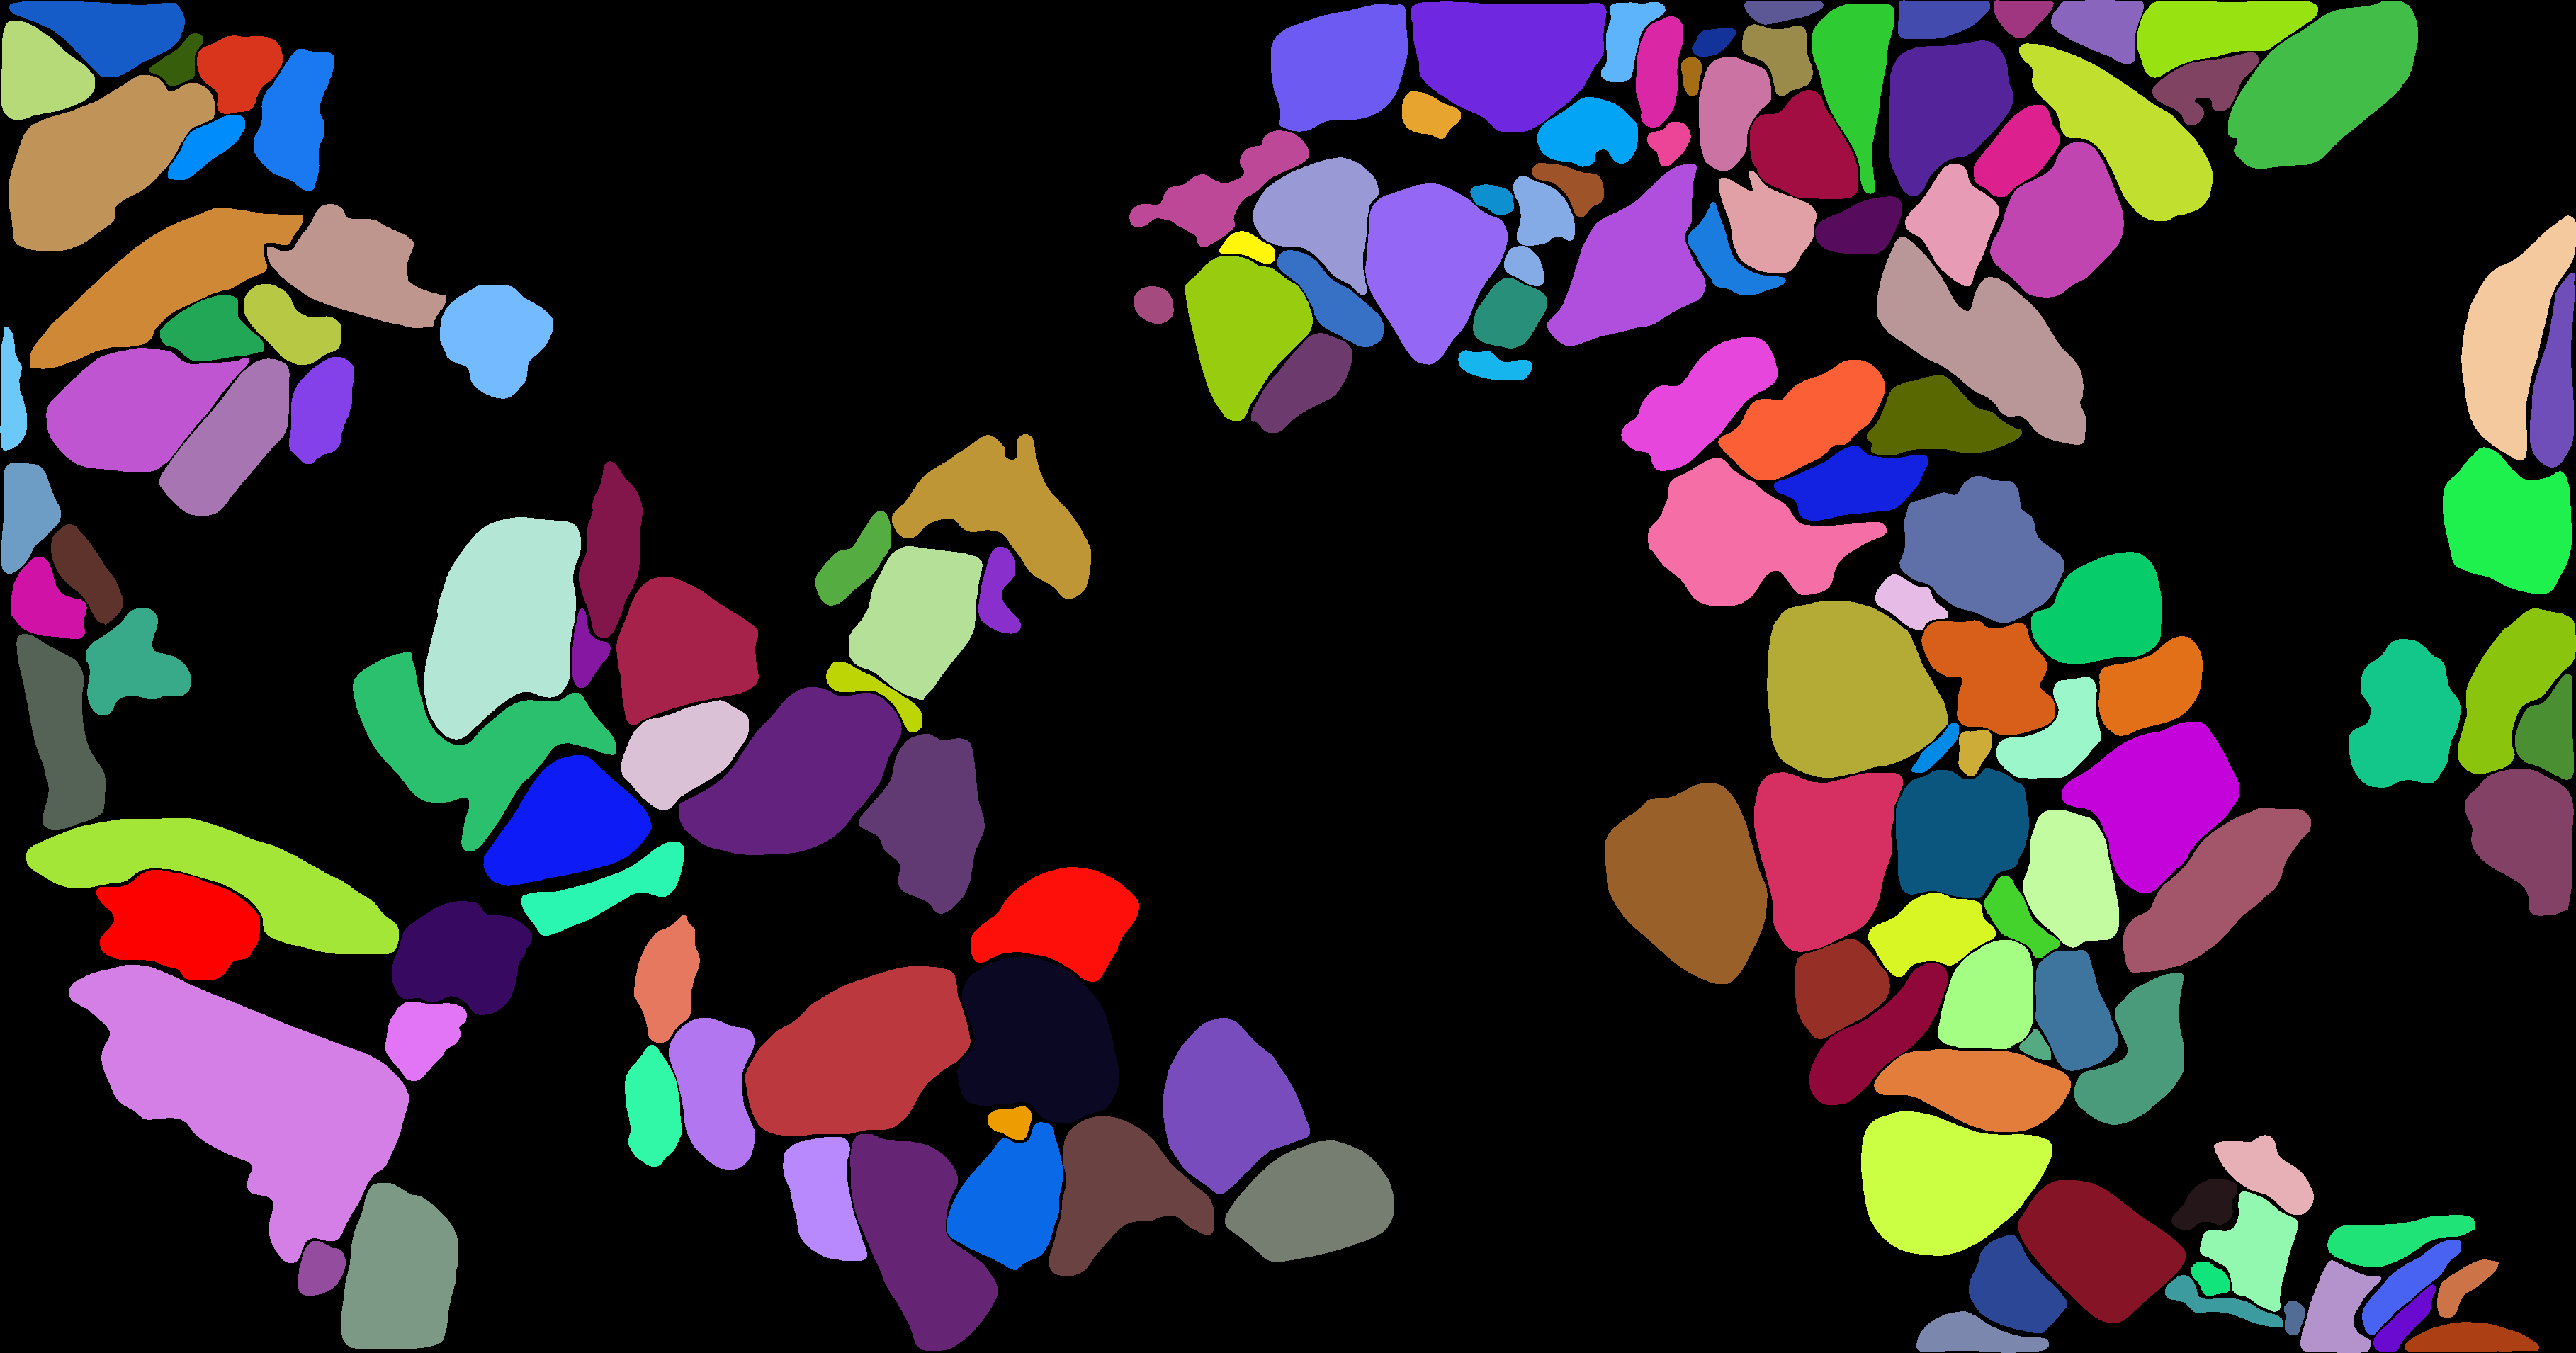

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import random
from google.colab.patches import cv2_imshow

contour_image_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_3.png'

contour_image = io.imread(contour_image_path)

gray_contour_image = cv2.cvtColor(contour_image, cv2.COLOR_RGB2GRAY)

_, binary_image = cv2.threshold(gray_contour_image, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = np.zeros_like(contour_image)

for contour in contours:
    color = [random.randint(0, 255) for _ in range(3)]
    cv2.drawContours(image_with_contours, [contour], -1, color, -1)

output_image_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_colored_contours_5.png'
cv2.imwrite(output_image_path, cv2.cvtColor(image_with_contours, cv2.COLOR_RGB2BGR))

cv2_imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_RGB2BGR))


## 🔍 Extracting and sorting contour data  
We analyze the contours in the image and sort them for further processing.


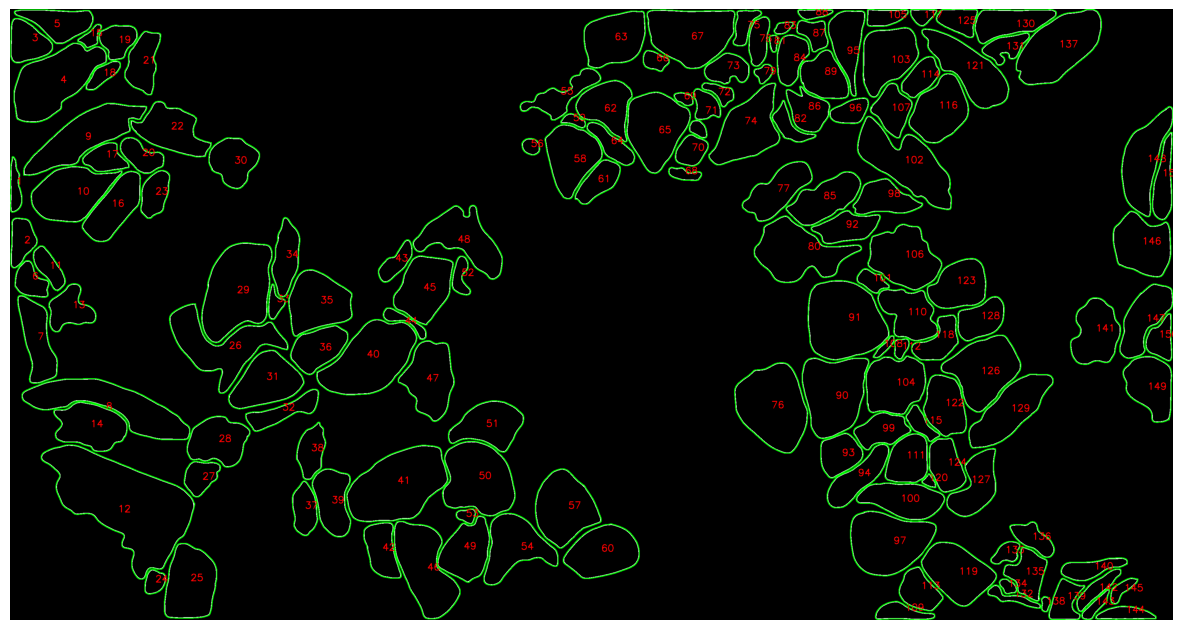

We have founded 151 contours.
Data was saved in /content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_data_5.csv


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import csv

contour_image_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_3.png'

contour_image = io.imread(contour_image_path)

gray_contour_image = cv2.cvtColor(contour_image, cv2.COLOR_RGB2GRAY)

_, binary_image = cv2.threshold(gray_contour_image, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_height = binary_image.shape[0]

bounding_boxes = [cv2.boundingRect(c) for c in contours]
contours = [contour for _, contour in sorted(zip(bounding_boxes, contours), key=lambda x: x[0][0])]

data = []

image_with_contours = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2RGB)
for i, contour in enumerate(contours):
    cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 2)
    x, y, w, h = cv2.boundingRect(contour)
    cx, cy = x + w // 2, y + h // 2
    cy_flipped = image_height - cy
    area = cv2.contourArea(contour)
    data.append([i + 1, cy_flipped, cx, area])
    cv2.putText(image_with_contours, str(i + 1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(image_with_contours)
plt.axis('off')
plt.show()

output_image_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_numbered_5.png'
cv2.imwrite(output_image_path, cv2.cvtColor(image_with_contours, cv2.COLOR_RGB2BGR))

output_csv_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_data_5.csv'
with open(output_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Number", "Position_Y", "Position_X", "Surface_pixels"])
    writer.writerows(data)

print(f'We have founded {len(contours)} contours.')
print(f'Data was saved in {output_csv_path}')


In [ ]:
!pip install colorthief


In [ ]:
import cv2
import numpy as np
import csv
from skimage import io

original_image_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI.jpg'
contour_image_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_3.png'

original_image = io.imread(original_image_path)
contour_image = io.imread(contour_image_path)

gray_contour_image = cv2.cvtColor(contour_image, cv2.COLOR_RGB2GRAY)

_, binary_image = cv2.threshold(gray_contour_image, 127, 255, cv2.THRESH_BINARY_INV)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_height = binary_image.shape[0]

bounding_boxes = [cv2.boundingRect(c) for c in contours]
contours = [contour for _, contour in sorted(zip(bounding_boxes, contours), key=lambda x: x[0][0])]

data = []

def calculate_luminosity(color):
    r, g, b = color
    return 0.2126 * r + 0.7152 * g + 0.0722 * b

def get_average_color(image, mask):
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    mean_color = cv2.mean(masked_image, mask=mask)
    return (int(mean_color[0]), int(mean_color[1]), int(mean_color[2]))

for i, contour in enumerate(contours):
    mask = np.zeros_like(gray_contour_image)
    cv2.drawContours(mask, [contour], -1, 255, -1)

    avg_color = get_average_color(original_image, mask)

    mean_luminosity = calculate_luminosity(avg_color)

    data.append([i + 1, avg_color, mean_luminosity])

output_csv_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_luminosity_5.csv'
with open(output_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Number", "Color_Average", "Luminosity_Average"])
    writer.writerows(data)

# Mostrar el número de contornos procesados
print(f'We have processed {len(contours)} contours.')
print(f'Data was saved in {output_csv_path}')


We have processed 151 contours.
Data was saved in /content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_luminosity_5.csv


## 🎨 Assigning colors to contours  
Using color classification, we assign colors to the contours to influence musical parameters.


In [ ]:
import csv
from scipy.spatial import KDTree

COLOR_NAMES = [
    ("black", (0, 0, 0)),
    ("white", (255, 255, 255)),
    ("red", (255, 0, 0)),
    ("lime", (0, 255, 0)),
    ("blue", (0, 0, 255)),
    ("yellow", (255, 255, 0)),
    ("cyan", (0, 255, 255)),
    ("magenta", (255, 0, 255)),
    ("silver", (192, 192, 192)),
    ("gray", (128, 128, 128)),
    ("maroon", (128, 0, 0)),
    ("olive", (128, 128, 0)),
    ("green", (0, 128, 0)),
    ("purple", (128, 0, 128)),
    ("teal", (0, 128, 128)),
    ("navy", (0, 0, 128)),
    ("orange", (255, 165, 0)),
    ("pink", (255, 192, 203)),
    ("brown", (165, 42, 42)),
    ("beige", (245, 245, 220)),
    ("chocolate", (210, 105, 30)),
    ("gold", (255, 215, 0)),
    ("darkred", (139, 0, 0)),
    ("darkgreen", (0, 100, 0)),
    ("darkblue", (0, 0, 139)),
    ("violet", (238, 130, 238)),
    ("indigo", (75, 0, 130)),
    ("coral", (255, 127, 80)),
    ("salmon", (250, 128, 114)),
    ("khaki", (240, 230, 140)),
    ("orchid", (218, 112, 214)),
    ("plum", (221, 160, 221)),
    ("gainsboro", (220, 220, 220)),
    ("peru", (205, 133, 63))
]


color_names = [color[0] for color in COLOR_NAMES]
color_values = [color[1] for color in COLOR_NAMES]
kdtree = KDTree(color_values)

def get_closest_color_name(rgb_color):
    _, idx = kdtree.query(rgb_color)
    return color_names[idx]


input_csv_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_luminosity_5.csv'
data = []

with open(input_csv_path, mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        number = int(row[0])
        avg_color = eval(row[1])
        luminosity = float(row[2])
        color_name = get_closest_color_name(avg_color)
        data.append([number, color_name, luminosity])

output_csv_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_names_luminosity_6.csv'
with open(output_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Number", "Color_Average", "Luminosity_Average"])
    writer.writerows(data)

print(f'Data was saved in {output_csv_path}')


Data was saved in /content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_names_luminosity_6.csv


In [ ]:
import csv

input_csv_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_names_luminosity_6.csv'

unique_colors = set()

with open(input_csv_path, mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        color_name = row[1]
        unique_colors.add(color_name)

print(f'There are {len(unique_colors)} different colors')

print("Unique colors:", unique_colors)


There are 8 different colors
Unique colors: {'pink', 'silver', 'gray', 'beige', 'indigo', 'salmon', 'plum', 'gainsboro'}


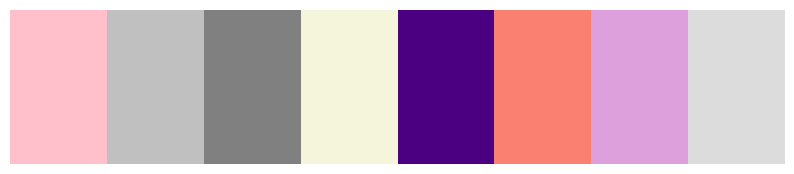

Color swatch was saved in /content/drive/MyDrive/Portrait_salivaire/color_nuancier_1.png


In [ ]:
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

input_csv_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_names_luminosity_6.csv'

unique_colors = set()

with open(input_csv_path, mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        color_name = row[1]
        unique_colors.add(color_name)

fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlim(0, len(unique_colors))
ax.set_ylim(0, 1)
ax.axis('off')

for i, color_name in enumerate(unique_colors):
    rect = mpatches.Rectangle((i, 0), 1, 1, edgecolor='none', facecolor=color_name)
    ax.add_patch(rect)

output_image_path = '/content/drive/MyDrive/Portrait_salivaire/color_nuancier_1.png'
plt.savefig(output_image_path, bbox_inches='tight')
plt.show()

print(f'Color swatch was saved in {output_image_path}')


## 🔗 Merging Data for Music generation  
We combine contour position data with color and luminosity information to generate musical sequences.


In [ ]:
import pandas as pd

csv1_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_data_5.csv'
df1 = pd.read_csv(csv1_path)

csv2_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_names_luminosity_6.csv'
df2 = pd.read_csv(csv2_path)

merged_df = pd.merge(df1, df2, on="Number")

output_csv_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_combined_data_1.csv'
merged_df.to_csv(output_csv_path, index=False)

print(f'The combined CSV has been saved to {output_csv_path}')


The combined CSV has been saved to /content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_combined_data_1.csv


In [ ]:
!pip install midiutil


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54567 sha256=8ccd0e79157a97f23701ef553195d34c232c9da240424cb1ffce9e743aea307f
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built midiutil


## 🎼 Generating the Musical sscore  
We convert the processed data into a MIDI composition, mapping color and shape features to pitch, duration, and dynamics.


In [ ]:
import cv2
import numpy as np
import pandas as pd
from midiutil import MIDIFile
from google.colab import files

csv_path = '/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_combined_data_1.csv'
data = pd.read_csv(csv_path)

midi = MIDIFile(8)

color_to_instrument = {
    'gainsboro': 0,
    'pink': 1,
    'silver': 2,
    'gray': 3,
    'plum': 4,
    'beige': 5,
    'salmon': 6,
    'indigo': 7
}

for color, track in color_to_instrument.items():
    midi.addTrackName(track, 0, color)


pitch_range = 88
min_pitch = 21
max_pitch = 108

max_y = data['Position_Y'].max()
min_y = data['Position_Y'].min()
max_luminosity = data['Luminosity_Average'].max()
min_luminosity = data['Luminosity_Average'].min()
max_superficie = data['Surface_pixels'].max()
min_superficie = data['Surface_pixels'].min()


max_duration_quarters = 8

score_data = []

for index, row in data.iterrows():
    numero = row['Number']
    posicion_y = row['Position_Y']
    posicion_x = row['Position_X']
    superficie_pixeles = row['Surface_pixels']
    color_promedio = row['Color_Average']
    luminosidad_promedio = row['Luminosity_Average']

    pitch = int(np.interp(posicion_y, [min_y, max_y], [min_pitch, max_pitch]))

    velocity = int(np.interp(luminosidad_promedio, [min_luminosity, max_luminosity], [127, 0]))

    duration_quarters = np.interp(superficie_pixeles, [min_superficie, max_superficie], [0.25, max_duration_quarters])

    instrument = color_to_instrument[color_promedio]

    score_data.append([numero, pitch, velocity, duration_quarters, instrument])


    start_time = posicion_x / 50
    midi.addNote(instrument, instrument, pitch, start_time, duration_quarters, velocity)
    midi.addText(instrument, start_time, f'Object {numero}')


score_csv_path = '/content/drive/MyDrive/Portrait_salivaire/musical_score_data_final_v5.csv'
score_df = pd.DataFrame(score_data, columns=['Numero', 'Pitch', 'Velocity', 'Duration', 'Instrument'])
score_df.to_csv(score_csv_path, index=False)


output_midi_path = '/content/drive/MyDrive/Portrait_salivaire/musical_score_final_v5.mid'
with open(output_midi_path, 'wb') as output_file:
    midi.writeFile(output_file)

print(f'The musical score data CSV has been saved to {score_csv_path}')
print(f'The MIDI file has been saved to {output_midi_path}')


The musical score data CSV has been saved to /content/drive/MyDrive/Portrait_salivaire/musical_score_data_final_v5.csv
The MIDI file has been saved to /content/drive/MyDrive/Portrait_salivaire/musical_score_final_v5.mid


In [11]:
!apt-get install git -y
!git config --global user.email "rominaromay@hotmail.com"
!git config --global user.name "RominaSR"
!git clone https://github.com/RominaSR/bio-data-music-portrait.git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Cloning into 'bio-data-music-portrait'...


In [ ]:
!git clone https://github.com/RominaSR/bio-data-music-portrait.git


In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!grep -o "/content/drive/MyDrive/[^'\" ]*" /content/drive/MyDrive/Colab\ Notebooks/Code_Portrait_salivaire.ipynb


/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_3.png
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_colored_contours_5.png
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_3.png
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_numbered_5.png
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_data_5.csv
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_data_5.csv\n
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI.jpg
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_3.png
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_luminosity_5.csv
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_luminosity_5.csv\n
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_luminosity_5.csv
/content/drive/MyDrive/Portrait_salivaire/8_SARAH_HAROUMI_contours_colors_names_luminosity_6.csv
/content/drive/MyDrive/Por